In [4]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('db1.csv')

# Merge two columns
merged_column = df['Type'].fillna('') + ' ' + df['Significance'].fillna('')

# Split merged column into individual keywords
keywords = ' '.join(merged_column).split()

# Get unique keywords
unique_keywords = list(set(keywords))

# Create a DataFrame with single column of unique keywords
result_df = pd.DataFrame(unique_keywords, columns=['Keywords'])

# Save the result to a new CSV file
result_df.to_csv('output_keywords.csv', index=False)


In [1]:
import pandas as pd

# Read the CSV files
df_sentences = pd.read_csv('Review_db.csv')
df_keywords = pd.read_csv('output_keywords.csv')

# Initialize a new column to store matched keywords
df_sentences['Matched_Keywords'] = None

# Iterate through each sentence
for index, sentence in df_sentences.iterrows():
    matched_words = []
    words = sentence['Review'].lower().split()
    # Iterate through each keyword
    for keyword in df_keywords['Keywords']:
        # Check if the keyword exists in the sentence
        if keyword.lower() in words:
            matched_words.append(keyword)
    # Join the matched words with space separator
    matched_keywords_str = ' '.join(matched_words) if matched_words else None
    # Update the 'Matched_Keywords' column for this sentence
    df_sentences.at[index, 'Matched_Keywords'] = matched_keywords_str

# Save the result to a new CSV file
df_sentences.to_csv('output_sentences.csv', index=False)
print(df_sentences.head(10))

                City                    Place  \
0  Aamby Valley City          19 Degree North   
1  Aamby Valley City          19 Degree North   
2  Aamby Valley City          19 Degree North   
3  Aamby Valley City          19 Degree North   
4  Aamby Valley City          19 Degree North   
5  Aamby Valley City          19 Degree North   
6  Aamby Valley City          19 Degree North   
7           Abhaneri  Chand Baori (Step well)   
8           Abhaneri  Chand Baori (Step well)   
9           Abhaneri  Chand Baori (Step well)   

                                              Review  Rating       Name  Date  \
0  aamby valley beautiful place clear blue skies ...       5  Anonymous   NaN   
1  executed obt akshay thanx team thoroughly enjo...       4  Anonymous   NaN   
2  awesome experience atv tracts obstacles mainta...       5  Anonymous   NaN   
3  visited aamby valley yesterday short excursion...       4  Anonymous   NaN   
4  far mumbai place finest adventure places visit...   

In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('output_sentences.csv')

# Drop two columns
columns_to_drop = ['Date', 'Name','Raw_Review']
df = df.drop(columns=columns_to_drop)

# Save the modified DataFrame to a new CSV file
df.to_csv('feature_selection.csv', index=False)
print(df.head(10))

                City                    Place  \
0  Aamby Valley City          19 Degree North   
1  Aamby Valley City          19 Degree North   
2  Aamby Valley City          19 Degree North   
3  Aamby Valley City          19 Degree North   
4  Aamby Valley City          19 Degree North   
5  Aamby Valley City          19 Degree North   
6  Aamby Valley City          19 Degree North   
7           Abhaneri  Chand Baori (Step well)   
8           Abhaneri  Chand Baori (Step well)   
9           Abhaneri  Chand Baori (Step well)   

                                              Review  Rating Matched_Keywords  
0  aamby valley beautiful place clear blue skies ...       5           Valley  
1  executed obt akshay thanx team thoroughly enjo...       4              NaN  
2  awesome experience atv tracts obstacles mainta...       5              NaN  
3  visited aamby valley yesterday short excursion...       4           Valley  
4  far mumbai place finest adventure places visit...       5

In [3]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('feature_selection.csv')
df['Matched_Keywords'].fillna("", inplace=True)
df['Matched_Keywords'] = df['Matched_Keywords'].astype(str)
#df['Matched_Keywords2'] = df['Matched_Keywords'].apply(lambda x:x.split())

# def join_keywords(keywords):
#     keywords_list = literal_eval(keywords)
#     # Join the list elements into a single string
#     return ' '.join(keywords_list)

#Group by 'City' and aggregate the data
aggregated_df = df.groupby('Place').agg({
    'City': 'first',  # Keep the first value of 'State' column
    'Review': ' '.join,  # Merge 'Review' column
    'Rating': 'mean',  # Calculate the mean of 'Rating' column
    'Matched_Keywords' : ' '.join,
})

# Round the mean rating to two decimals
aggregated_df['Rating'] = aggregated_df['Rating'].round(2)

# Add a new column 'Count' which shows the number of rows merged for each city
aggregated_df['Review_Count'] = df['Place'].value_counts()

# Reset index to make 'City' a regular column
aggregated_df.reset_index(inplace=True)

# Save the aggregated DataFrame to a new CSV file
aggregated_df.to_csv('aggregated.csv', index=False)
print(aggregated_df.head(10))

                                    Place               City  \
0                          1 MG Lido Mall          Bengaluru   
1                           10 Acres Mall          Ahmedabad   
2                      1008 Lingam Temple              Salem   
3                    101 Ft. Hanuman Idol         Chhindwara   
4  108 Feet Height Statue Of Basaveshwara              Bidar   
5       108 Parshwanath Bhaktivihar Tirth       Shankheshwar   
6                         108 Shiv Mandir              Kalna   
7                    108 Vinayagar Temple           Dindigul   
8                              11D Cinema  Bokaro Steel City   
9                    1857 Memorial Museum            Lucknow   

                                              Review  Rating  \
0  mg lido mall right trinity circle end bangalor...    4.26   
1  acres mall ahmedabad city mall spans area acre...    3.20   
2  shiv lingas spot good felt blessed great time ...    4.30   
3  tall feet red coloured idol near chi

In [4]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('City.csv')

# Merge two columns
merged_column = df['Best_time_to_visit'].fillna('')

# Split merged column into individual keywords
keywords = ' '.join(merged_column).split()

# Get unique keywords
unique_keywords = list(set(keywords))

# Create a DataFrame with single column of unique keywords
result_df = pd.DataFrame(unique_keywords, columns=['Keywords'])

# Save the result to a new CSV file
result_df.to_csv('output_period.csv', index=False)

In [5]:
import pandas as pd
import numpy as np

# Function to randomly choose a default value
def random_default_value(default_values):
    return np.random.choice(default_values)

# Read the first CSV file with city and time to watch
df1 = pd.read_csv('city.csv')

columns_to_drop = ['City_desc', 'Ratings', 'Ideal_duration']
df1 = df1.drop(columns=columns_to_drop)

# Read the second CSV file with city and other columns
df2 = pd.read_csv('aggregated.csv')

# Merge the two DataFrames based on the 'city' column
merged_df = pd.merge(df2, df1, on='City', how='left')

# Define default value options
default_values_df = pd.read_csv('output_period.csv')
default_values = default_values_df['Keywords'].tolist()

# Fill NaN values in the 'Best_time_to_visit' column with a randomly chosen default value
merged_df['Best_time_to_visit'] = merged_df['Best_time_to_visit'].apply(lambda x: random_default_value(default_values) if pd.isnull(x) else x)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('time_added1.csv', index=False)


In [6]:
import pandas as pd
import re
# Read the CSV file
df = pd.read_csv('time_added1.csv')
def remove_non_english(sentence):
    # Define a regular expression pattern to match non-English characters
    non_english_pattern = re.compile(r'[^\x00-\x7F]+')
    # Replace non-English characters with an empty string
    english_sentence = re.sub(non_english_pattern, '', sentence)
    return english_sentence.strip()  # Remove leading and trailing whitespaces
df['Review'] = df['Review'].apply(remove_non_english)
print("Removed non english words")

Removed non english words


In [7]:
# Specify the column containing multiple words
column_name = 'Review'

# Function to make values unique within each row
def make_unique(row):
    words = row[column_name].split()  # Split the string into words
    unique_words = list(set(words))   # Remove duplicates by converting to set and then back to list
    return ' '.join(unique_words)     # Join the unique words back into a string

# Apply the function to the specified column
df['Review'] = df.apply(make_unique, axis=1)


In [8]:
# Specify the column containing multiple words
column_name = 'Matched_Keywords'

# Function to make values unique within each row
def make_unique(row):
    if pd.isnull(row[column_name]):  # Check if the value is NaN
        return row[column_name]      # If NaN, return it as it is
    else:
        words = row[column_name].split()  # Split the string into words
        unique_words = list(set(words))   # Remove duplicates by converting to set and then back to list
        return ' '.join(unique_words)     # Join the unique words back into a string

# Apply the function to the specified column
df['Matched_Keywords'] = df.apply(make_unique, axis=1)

In [9]:
df['Matched_Keywords'].isna().sum()

350

In [10]:
# Save the updated DataFrame to a new CSV file
df_cleaned = df.dropna(how='any')
df_cleaned.to_csv('updated_file.csv', index=False)

In [11]:
# Read the CSV file
df = pd.read_csv('updated_file.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14144 entries, 0 to 14143
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Place               14144 non-null  object 
 1   City                14144 non-null  object 
 2   Review              14144 non-null  object 
 3   Rating              14144 non-null  float64
 4   Matched_Keywords    13751 non-null  object 
 5   Review_Count        14144 non-null  int64  
 6   Best_time_to_visit  14144 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 773.6+ KB


count    14144.000000
mean       104.787613
std        484.350227
min          1.000000
25%          4.000000
50%         13.000000
75%         46.000000
max      23231.000000
Name: Review_Count, dtype: float64


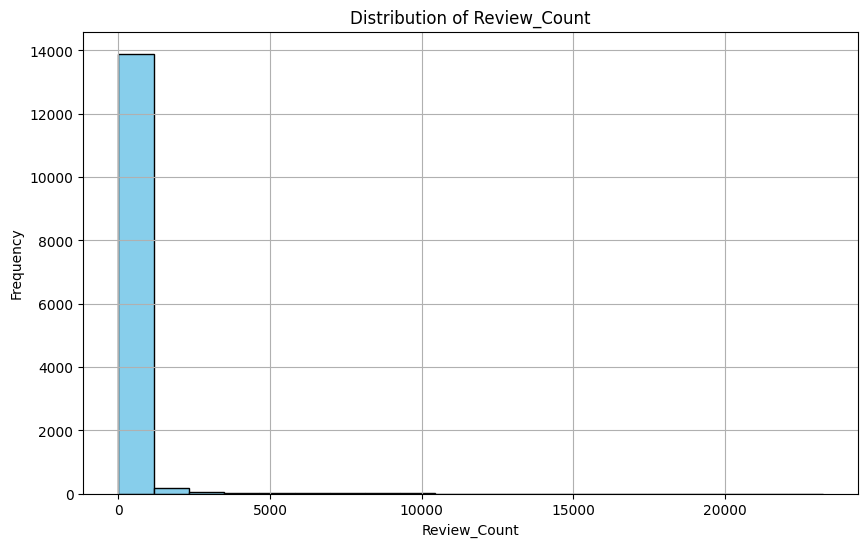

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# Assuming your DataFrame is named df
# Example: df = pd.read_csv('your_data.csv')

# Describe the column to get statistical summary
column_name = 'Review_Count'
column_description = df[column_name].describe()
print(column_description)

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(df[column_name], bins=20, color='skyblue', edgecolor='black')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title('Distribution of {}'.format(column_name))
plt.grid(True)
plt.show()


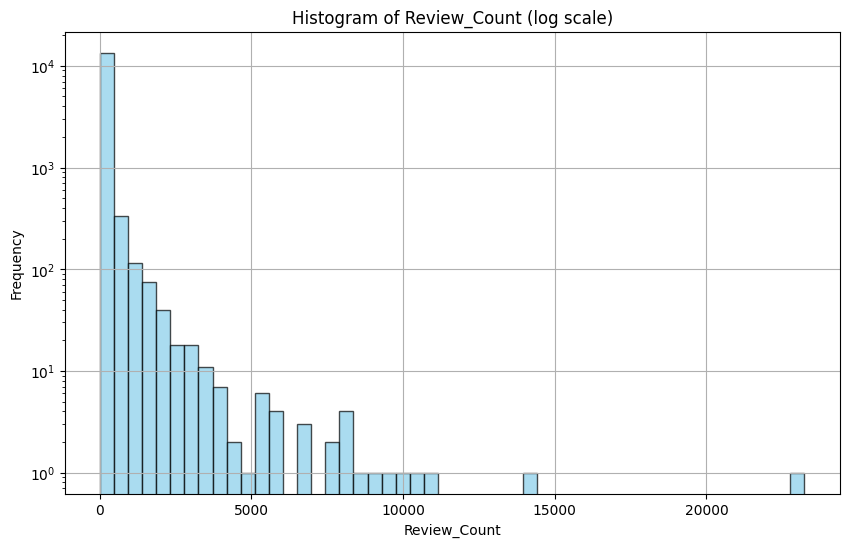

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# Example: df = pd.read_csv('your_data.csv')

# Specify the column you want to analyze
column_name = 'Review_Count'

# Create the histogram with logarithmic scale
plt.figure(figsize=(10, 6))
plt.hist(df[column_name], bins=50, color='skyblue', edgecolor='black', alpha=0.7, log=True)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title('Histogram of {} (log scale)'.format(column_name))
plt.grid(True)
plt.show()



In [14]:
import numpy as np

# Assuming your DataFrame is named df and the column is 'num_ratings'
# Example: data = df['num_ratings']
data = df['Review_Count']
# Sort the data
sorted_data = np.sort(data)

# Calculate the cumulative distribution function (CDF)
cdf = np.cumsum(sorted_data) / np.sum(sorted_data)

# Find the value that covers 90% of the data
percentile_90 = np.percentile(sorted_data, 80)
index_90 = np.argmax(cdf >= 0.9)

print("Value covering 90% of the data (using percentile):", percentile_90)
print("Value covering 90% of the data (using CDF):", sorted_data[index_90])


Value covering 90% of the data (using percentile): 64.0
Value covering 90% of the data (using CDF): 6632


count    14144.000000
mean         4.146575
std          0.454564
min          1.000000
25%          3.950000
50%          4.180000
75%          4.430000
max          5.000000
Name: Rating, dtype: float64


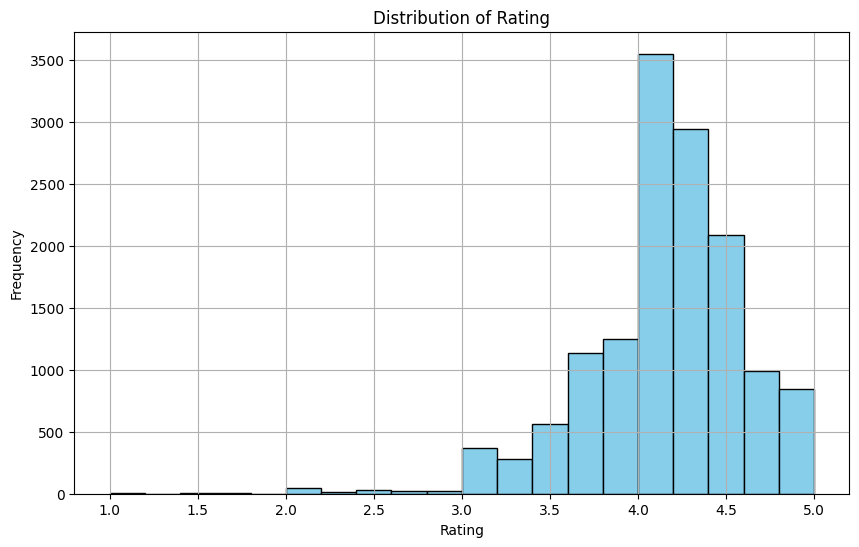

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('updated_file.csv')
# Load your data into a DataFrame
# Assuming your DataFrame is named df
# Example: df = pd.read_csv('your_data.csv')

# Describe the column to get statistical summary
column_name = 'Rating'
column_description = df[column_name].describe()
print(column_description)

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(df[column_name], bins=20, color='skyblue', edgecolor='black')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title('Distribution of {}'.format(column_name))
plt.grid(True)
plt.show()


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('updated_file.csv')

def calculate_popularity(average_rating, num_ratings):
    """
    Calculate the popularity score based on average rating and number of ratings.

    Args:
        average_rating (float): The average rating of the item.
        num_ratings (int): The number of ratings the item has received.

    Returns:
        float: The popularity score of the item.
    """
    # If the number of ratings is more than 100, assign a popularity of 1
    if average_rating <= 2:
        return 0.25
    # If the average rating is 2 or below, assign a popularity of 0.5
    elif num_ratings > 60:
        popularity_score = (average_rating/5)
        return popularity_score
    else:
        popularity_score = (0.5 * (average_rating / 5)) + (0.5 * (num_ratings /60))
        return popularity_score

# Apply the function to create the "popularity" column
df['popularity'] = df.apply(lambda row: calculate_popularity(row['Rating'], row['Review_Count']), axis=1)
df.to_csv('popularity.csv', index=False)
print(df.head(10))
df['popularity'].describe()

                                    Place               City  \
0                          1 MG Lido Mall          Bengaluru   
1                           10 Acres Mall          Ahmedabad   
2                      1008 Lingam Temple              Salem   
3                    101 Ft. Hanuman Idol         Chhindwara   
4  108 Feet Height Statue Of Basaveshwara              Bidar   
5       108 Parshwanath Bhaktivihar Tirth       Shankheshwar   
6                         108 Shiv Mandir              Kalna   
7                    108 Vinayagar Temple           Dindigul   
8                              11D Cinema  Bokaro Steel City   
9                    1857 Memorial Museum            Lucknow   

                                              Review  Rating  \
0  decorative elegant think kulfi cuisines friend...    4.26   
1  cinema closed wash theatre reliance extra skip...    3.20   
2  peryakovil suitable security mission vinayaga ...    4.30   
3  p pradesh near come tall lord surrou

count    14144.000000
mean         0.593154
std          0.170799
min          0.250000
25%          0.466667
50%          0.531000
75%          0.764000
max          0.980000
Name: popularity, dtype: float64

count    14144.000000
mean         0.593154
std          0.170799
min          0.250000
25%          0.466667
50%          0.531000
75%          0.764000
max          0.980000
Name: popularity, dtype: float64


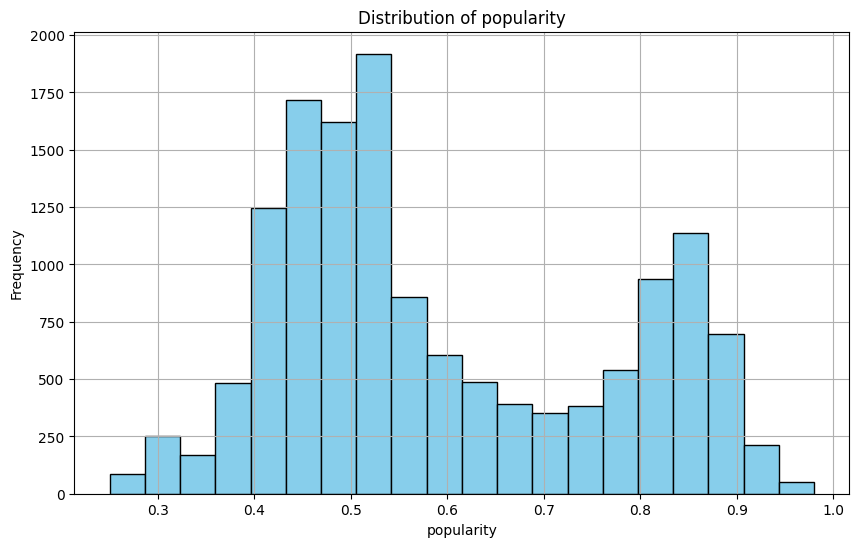

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('popularity.csv')
# Load your data into a DataFrame
# Assuming your DataFrame is named df
# Example: df = pd.read_csv('your_data.csv')

# Describe the column to get statistical summary
column_name = 'popularity'
column_description = df[column_name].describe()
print(column_description)

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(df[column_name], bins=20, color='skyblue', edgecolor='black')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title('Distribution of {}'.format(column_name))
plt.grid(True)
plt.show()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('popularity.csv')
num1 = df['Matched_Keywords'].isna().sum()
print(num1)
print(df['Matched_Keywords'].unique())
df['Matched_Keywords'].dropna(inplace = True)
df.dropna(how='any',inplace = True)
num1 = df['Matched_Keywords'].isna().sum()
print(num1)
print(df['Matched_Keywords'].unique())
print(df.head())
df.to_csv('final.csv', index=False)

393
['Sports Gurudwara Food Tea Commercial Lake Church Entertainment Architectural Building Mall Cricket Point Park Shopping Market'
 'Commercial Entertainment Building Mall Shopping'
 'Hill Food Religious Ground Temple Mountain Center Spiritual Temples Landmark Complex National Garden Engineering'
 ... 'Natural Adventure Village Nature Trekking Mountain'
 'Gurudwara Food Swim Ghat Religious Commercial Nature Temple Spiritual Center Temples Waterfall River Rock Crossing'
 'Palace Commercial Food Resort Cultural']
0
['Sports Gurudwara Food Tea Commercial Lake Church Entertainment Architectural Building Mall Cricket Point Park Shopping Market'
 'Commercial Entertainment Building Mall Shopping'
 'Hill Food Religious Ground Temple Mountain Center Spiritual Temples Landmark Complex National Garden Engineering'
 ... 'Natural Adventure Village Nature Trekking Mountain'
 'Gurudwara Food Swim Ghat Religious Commercial Nature Temple Spiritual Center Temples Waterfall River Rock Crossing'
 'Palac